In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings( "ignore")

In [5]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
print(df.shape)


(303, 14)


In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [8]:
print(df.describe())


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [9]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
df['target'].value_counts()

,count
target,
1,165
0,138


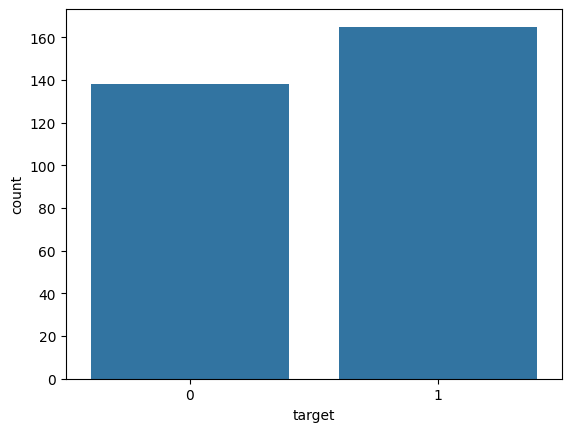

In [11]:
sns.countplot(x='target', data=df)
plt.show()

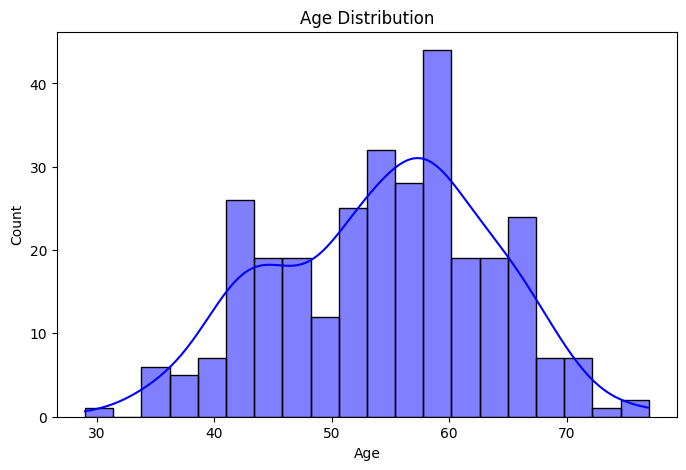

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Interpretation - Usually peaks around 50–60 years, since heart disease risk rises with age.

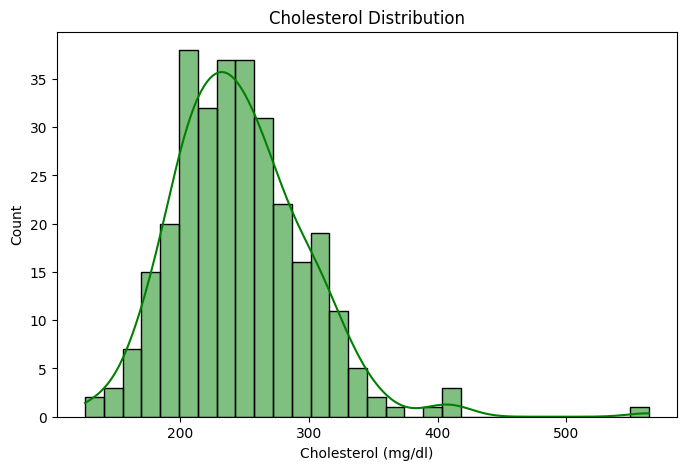

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['chol'], bins=30, kde=True, color="green")
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol (mg/dl)")
plt.ylabel("Count")
plt.show()

Interpretation - spread around 200–250, but some outliers (values > 500)

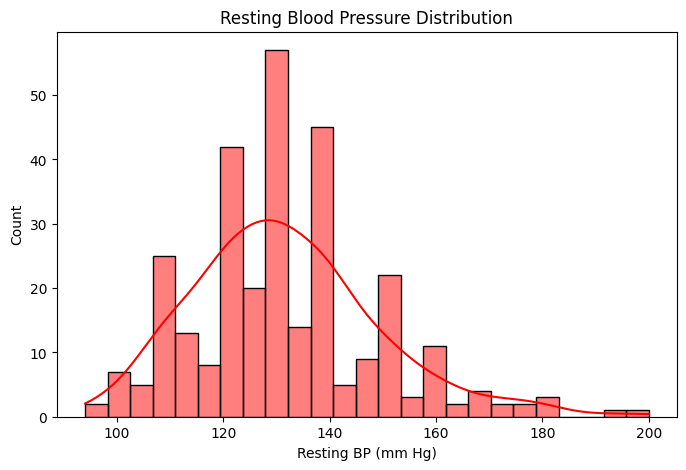

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['trestbps'], bins=25, kde=True, color="red")
plt.title("Resting Blood Pressure Distribution")
plt.xlabel("Resting BP (mm Hg)")
plt.ylabel("Count")
plt.show()

Interpretation - Normal is 120, but many patients in the dataset are above 140 (hypertension).

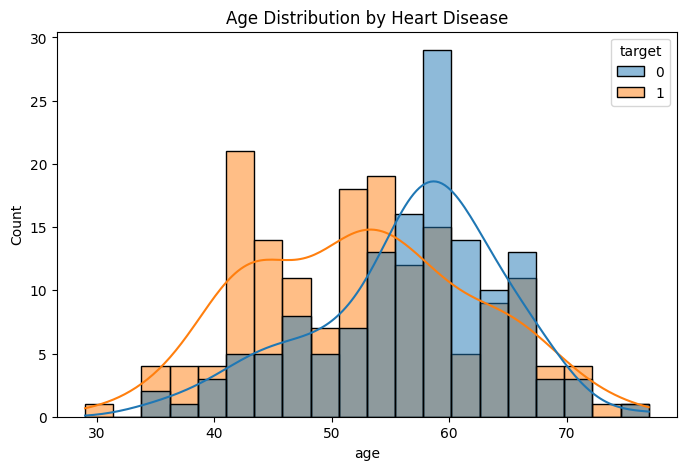

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='target', kde=True, bins=20)
plt.title("Age Distribution by Heart Disease")
plt.show()

Patients with heart disease often cluster in 50–60 age range

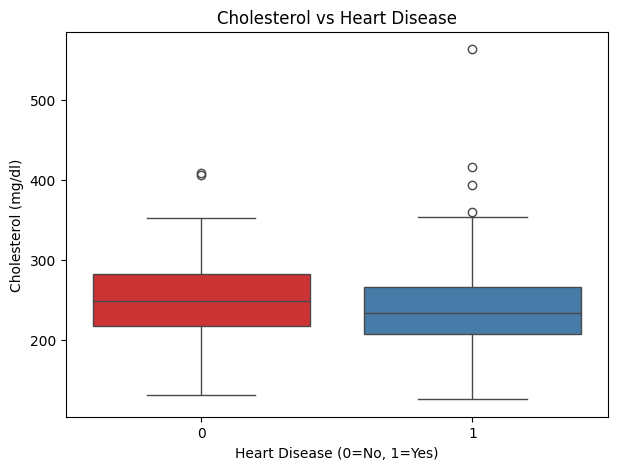

In [16]:
plt.figure(figsize=(7,5))
sns.boxplot(x='target', y='chol', data=df, palette="Set1")
plt.title("Cholesterol vs Heart Disease")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Cholesterol (mg/dl)")
plt.show()

outliers in cholesterol (some > 500), but median values don’t differ much.
That’s why cholesterol alone is not a strong predict

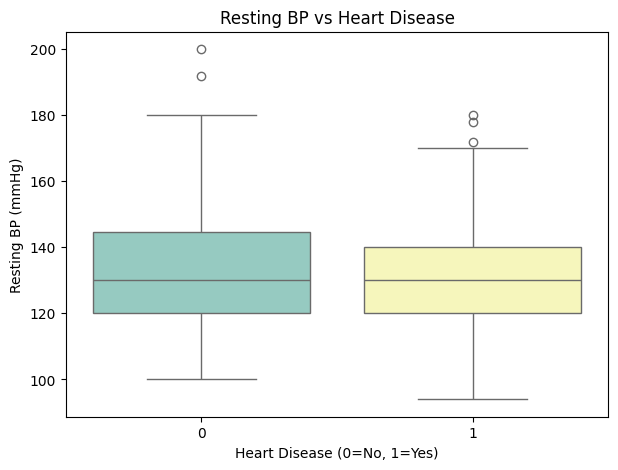

In [17]:
plt.figure(figsize=(7,5))
sns.boxplot(x='target', y='trestbps', data=df, palette="Set3")
plt.title("Resting BP vs Heart Disease")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Resting BP (mmHg)")
plt.show()

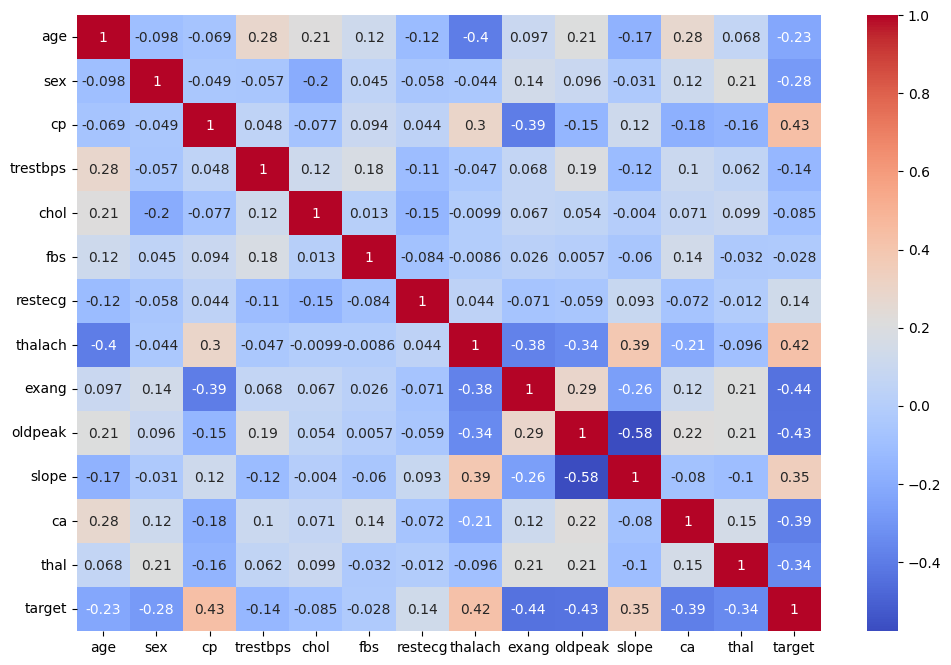

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [20]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [21]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [55]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [63]:
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()

In [64]:
model.fit(X_train, Y_train)

LogisticRegression()

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [67]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [68]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [69]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


In [70]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [71]:
import pickle

In [72]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [73]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [74]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
